age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64
Num Features: 12
Selected Features: [False False False  True  True  True  True  True False False False  True
 False False  True False False  True  True  True False  True  True False]
Feature Ranking: [ 5  4 13  1  1  1  1  1 11  7  8  1  6  9  1  3 10  1  1  1 12  1  1  2]
Features sorted by their rank:
[(1, 'al'), (1, 'appet'), (1, 'dm'), (1, 'hemo'), (1, 'htn'), (1, 'pc'), (1, 'pcc'), (1, 'pe'), (1, 'rbc'), (1, 'rc'), (1, 'sc'), (1, 'su'), (2, 'ane'), (3, 'pcv'), (4, 'bp'), (5, 'a

C:\Users\edony\AppData\Local\Temp\ipykernel_10280\902560297.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_selected.loc[:, 'classification'] = target
C:\Users\edony\AppData\Local\Temp\ipykernel_10280\902560297.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_selected['classification'] = target


               al          su         rbc          pc         pcc          sc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     1.014449    0.402642    0.882500    0.810000    0.105000    2.638217   
std      1.265436    0.867226    0.322418    0.392792    0.306937    2.883687   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.900000   
50%      1.000000    0.000000    1.000000    1.000000    0.000000    1.400000   
75%      2.000000    0.450142    1.000000    1.000000    0.000000    3.072454   
max      4.000000    3.000000    1.000000    1.000000    1.000000   11.800250   

             hemo          rc         htn          dm       appet          pe  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    12.573437    4.714947    0.367500    3.300000    0.205000    0.190000   
std      2.515575    0.7460

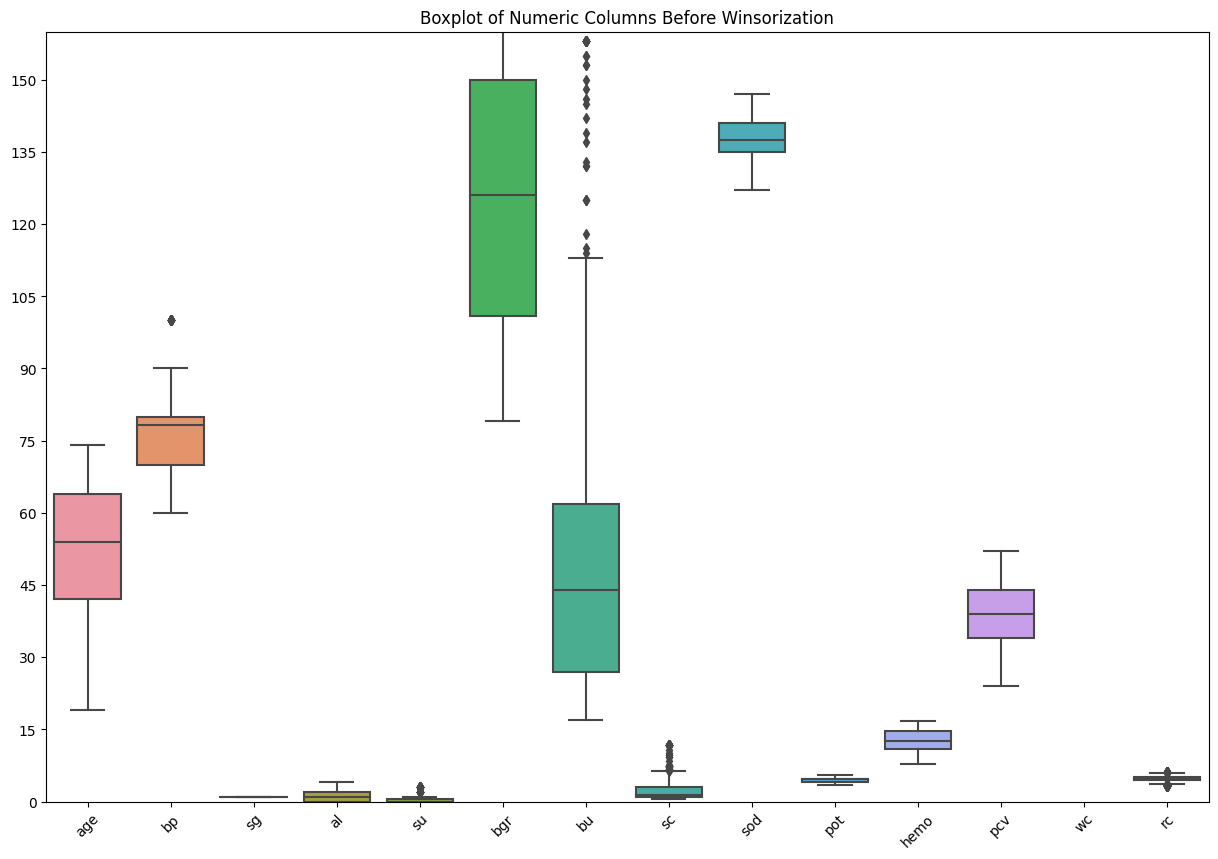

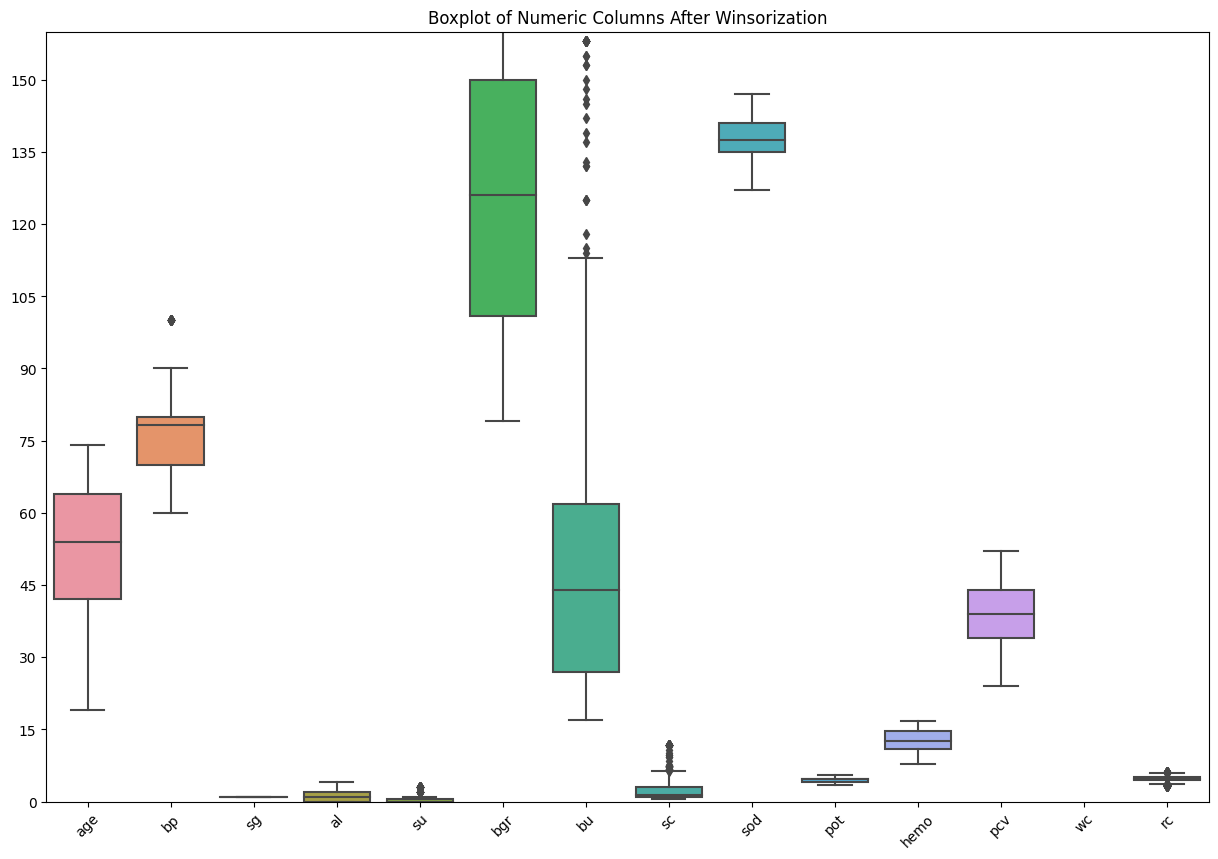

               al          su         rbc          pc         pcc          sc  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean     1.014449    0.402642    0.882500    0.810000    0.105000    2.638217   
std      1.265436    0.867226    0.322418    0.392792    0.306937    2.883687   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.500000   
25%      0.000000    0.000000    1.000000    1.000000    0.000000    0.900000   
50%      1.000000    0.000000    1.000000    1.000000    0.000000    1.400000   
75%      2.000000    0.450142    1.000000    1.000000    0.000000    3.072454   
max      4.000000    3.000000    1.000000    1.000000    1.000000   11.800250   

             hemo          rc         htn          dm       appet          pe  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    12.573437    4.714947    0.367500    3.300000    0.205000    0.190000   
std      2.515575    0.7460

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# load dataset
df = pd.read_csv("kidney_disease.csv")
# drop the id column
df = df.drop(columns='id')

# instantiate encoder
encoder = LabelEncoder()

# convert 'pcv', 'wc', and 'rc' to numeric, coerce errors to NaN
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

# fill null values in numeric columns ('pcv', 'wc', 'rc') with their mean
df['pcv'] = df['pcv'].fillna(df['pcv'].mean())
df['wc'] = df['wc'].fillna(df['wc'].mean())
df['rc'] = df['rc'].fillna(df['rc'].mean())

# additional numeric columns that need null values filled
additional_numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
for column in additional_numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

# fill null values in categorical columns with most frequent value (mode)
categorical_columns = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

# verify all null values are filled
null_values_final_check = df.isnull().sum()

# print final check for null values to confirm
print(null_values_final_check)

# perform winsonization to remove outliers at 5th and 95th percentiles
# create list of numeric columns to winsonize
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
# create for loop to winsonize each numeric column
for column in numeric_columns:
    q1 = df[column].quantile(0.05)
    q3 = df[column].quantile(0.95)
    df[column] = df[column].mask(df[column] < q1, q1)
    df[column] = df[column].mask(df[column] > q3, q3)

# identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# apply encoder to each non-numeric column
for column in non_numeric_columns:
    df[column] = encoder.fit_transform(df[column])

# perform wrapper method feature selection using RFE
# separate target variable from features
features = df.drop(columns='classification')
target = df['classification']

# perform RFE
model = LogisticRegression(solver='saga', max_iter=7000)
rfe = RFE(model)
fit = rfe.fit(features, target)

# display features selected by RFE
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), features)))

# create new dataframe with only selected features
selected_features = features.columns[fit.support_]
features_selected = features[selected_features]

# add target back in
features_selected.loc[:, 'classification'] = target

# use pandas describe function to display summary statistics
print(features_selected.describe())

# save fully cleaned dataset to new CSV file
features_selected.to_csv(r"output.csv", index=False)

# define Winsorization function
def winsorize_column(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = data[column].quantile(lower_percentile)
    upper_limit = data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_limit, upper=upper_limit)
    return data
    
# instantiate encoder
encoder = LabelEncoder()

# apply label encoding to non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
for column in non_numeric_columns:
    df[column] = encoder.fit_transform(df[column])

# perform Winsorization
numeric_columns = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for column in numeric_columns:
    df = winsorize_column(df, column)
    
# perform RFE
features = df.drop(columns='classification')
target = df['classification']
model = LogisticRegression(solver='saga', max_iter=7000)
rfe = RFE(model)
fit = rfe.fit(features, target)

# display summary statistics for dataset after Winsorization
selected_features = features.columns[fit.support_]
features_selected = features[selected_features]
features_selected['classification'] = target
print(features_selected.describe())

# adjust x-axis and y-axis limits in boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Columns Before Winsorization')
plt.xticks(rotation=45)
plt.ylim(0, 160)  # Adjust the y-axis limit
plt.yticks(range(0, 161, 15))  # Set y-axis tick intervals to 15
plt.show()

# visualize outliers after Winsorization with adjusted axis limits
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplot of Numeric Columns After Winsorization')
plt.xticks(rotation=45)
plt.ylim(0, 160)  # Adjust the y-axis limit
plt.yticks(range(0, 161, 15))  # Set y-axis tick intervals to 15
plt.show()

# display summary statistics for dataset after Winsorization
print(features_selected.describe())